In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv("diamonds.csv")

In [3]:
# First 3 columns
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [4]:
# Shape of data
df.shape

(53940, 10)

In [5]:
# Renaming columns
df.rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'depth%'}, inplace = True)

In [6]:
# Creating Target column seperately to concat it at the end of the columns
df_target = df[['price']]
df_target.head(3)

,price
0,326
1,326
2,327


In [7]:
# Dropping the Target column
df = df.drop('price', axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [8]:
# Concating Target column at the end of the columns
df = pd.concat([df, df_target], axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


In [9]:
# Shape of data
df.shape

(53940, 10)

### EDA

In [10]:
# Description of data
df.describe()

,carat,depth%,table,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [11]:
# There are missing values assigned as 0 in columns
df[['length','width','depth']][(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [12]:
# Replacing 0 (missing values) with Null values (np.NaN).
df[['length','width','depth']] = df[['length','width','depth']].replace(0, np.NaN)

In [13]:
# Checking Null Values
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      8
width       7
depth      20
price       0
dtype: int64

In [14]:
# Dropping Null Values
df.dropna(inplace = True)

In [15]:
# Rechecking Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
price      0
dtype: int64

In [16]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth%   53920 non-null  float64
 5   table    53920 non-null  float64
 6   length   53920 non-null  float64
 7   width    53920 non-null  float64
 8   depth    53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [17]:
# Shape of data
df.shape

(53920, 10)

**Observation:** There are no Null Values in our DataFrame.

### Univariate Analysis on Continous Variables:

<AxesSubplot:>

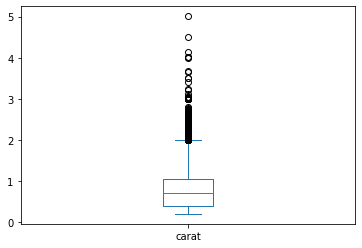

In [18]:
# Carat Column
df['carat'].plot.box()

<AxesSubplot:>

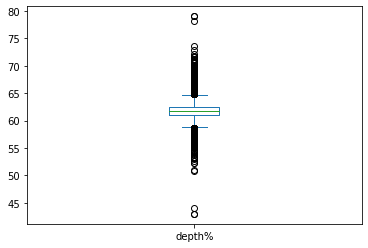

In [19]:
# Depth% Column
df['depth%'].plot.box()

<AxesSubplot:>

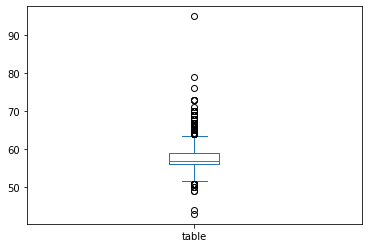

In [20]:
# Table Column
df['table'].plot.box()

<AxesSubplot:>

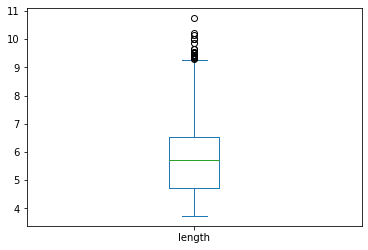

In [21]:
# Length Column
df['length'].plot.box()

<AxesSubplot:>

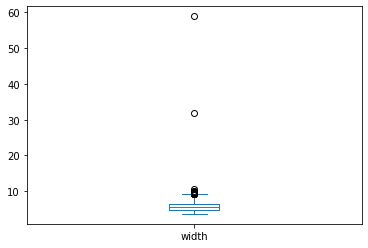

In [22]:
# Width Column
df['width'].plot.box()

<AxesSubplot:>

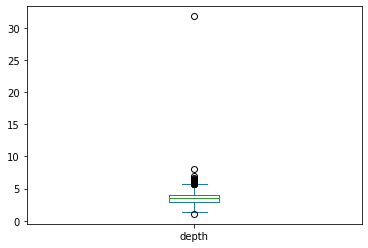

In [23]:
# Depth Column
df['depth'].plot.box()

<AxesSubplot:>

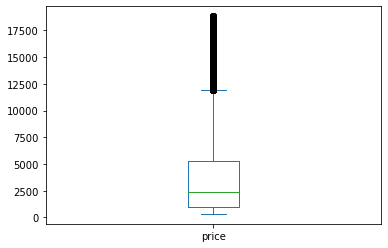

In [24]:
# Price Column
df['price'].plot.box()

### Univariate Analysis on Categorical Variable:

<AxesSubplot:>

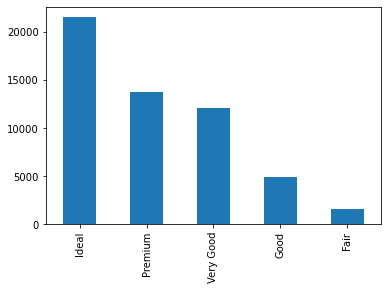

In [25]:
# BARPLOT for CUT
df['cut'].value_counts().plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:>

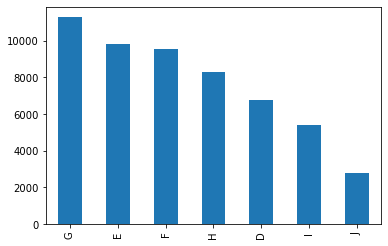

In [26]:
# BARPLOT for COLOR
df['color'].value_counts().plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:>

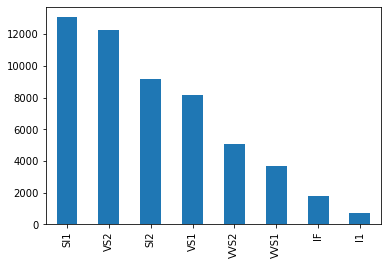

In [27]:
# BARPLOT for CLARITY
df['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### Bivariate Analysis on Numerical- Numerical Variables:

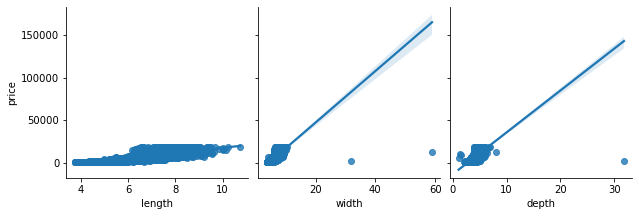

In [28]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

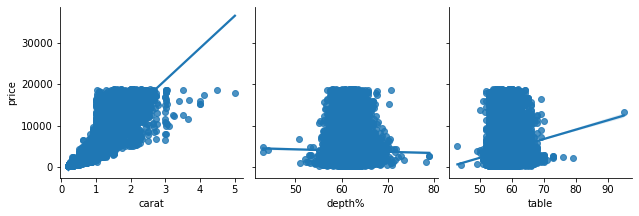

In [29]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

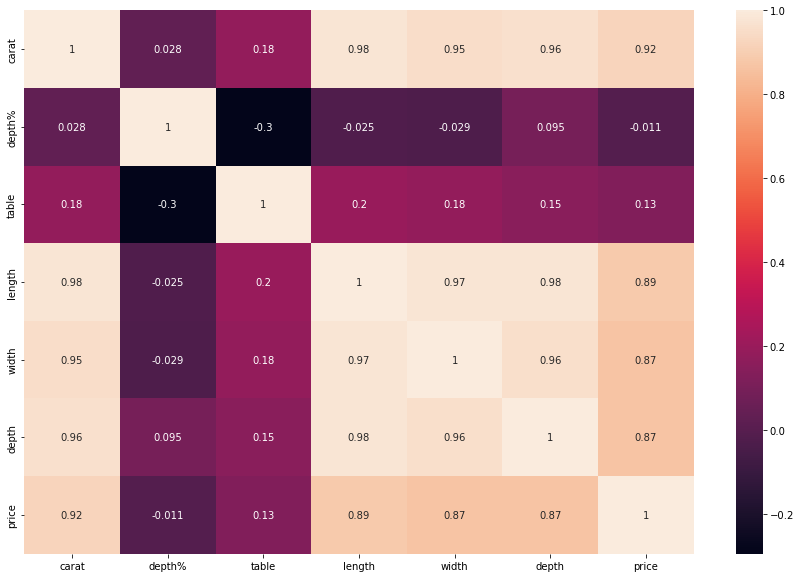

In [30]:
# Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)

#### There is a high correlation between carat, length, width, depth and price.

### Bivariate Analysis on Categorical - Continous Variables:

<AxesSubplot:xlabel='cut'>

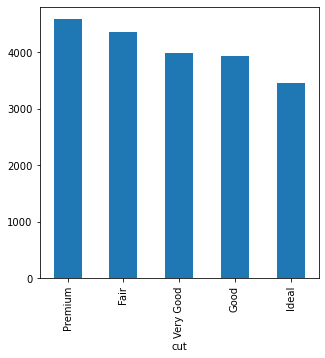

In [31]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:xlabel='color'>

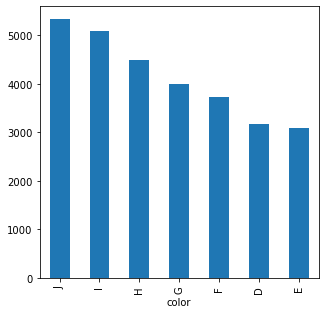

In [32]:
# BARPLOT for Color and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:xlabel='clarity'>

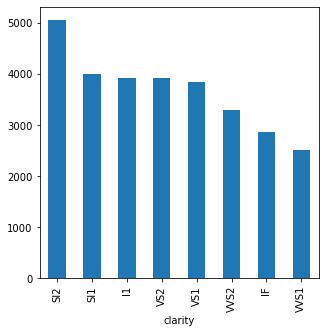

In [33]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))